# Sentiment Analysis Tweets

## Extract Data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#Train Data
trainDf =  pd.read_csv('Train.txt', sep='	', names=["id","text","emotion","intensity"], engine='python')
trainDf=trainDf.drop("id",axis=1)
print("Initial Shape of train data:",trainDf.shape)

AngerDf = trainDf[trainDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>=0.4]
AngerDf["emotion"] = 0

FearDf = trainDf[trainDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.4]
FearDf["emotion"] = 1

JoyDf = trainDf[trainDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.4]
JoyDf["emotion"] = 2

SadDf = trainDf[trainDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.4]
SadDf["emotion"] = 3

trainDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of train dataset:",trainDf.shape)
print(trainDf.head(10))
print()


#Cross Validation Data
crossValDf =  pd.read_csv('CrossValidate.txt', sep='	', names=["id","text","emotion","intensity"], engine='python')
crossValDf=crossValDf.drop("id",axis=1)
print("Initial Shape of CV data:",crossValDf.shape)


AngerDf = crossValDf[crossValDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>0.4]
AngerDf["emotion"] = 0

FearDf = crossValDf[crossValDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.4]
FearDf["emotion"] = 1

JoyDf = crossValDf[crossValDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.4]
JoyDf["emotion"] = 2

SadDf = crossValDf[crossValDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.4]
SadDf["emotion"] = 3

crossValDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of CV data:",crossValDf.shape)
print(crossValDf.head(10))
print()


#Test Data
testDf =  pd.read_csv('Test.txt', sep='	', names=["id","text","emotion","intensity"], engine='python')
testDf=testDf.drop("id",axis=1)
print("Initial Shape of Test data:",testDf.shape)


AngerDf = testDf[testDf["emotion"]=="anger"].drop("emotion",axis=1)
AngerDf = AngerDf[AngerDf["intensity"]>=0.4]
AngerDf["emotion"] = 0

FearDf = testDf[testDf["emotion"]=="fear"].drop("emotion",axis=1)
FearDf = FearDf[FearDf["intensity"]>=0.4]
FearDf["emotion"] = 1

JoyDf = testDf[testDf["emotion"]=="joy"].drop("emotion",axis=1)
JoyDf = JoyDf[JoyDf["intensity"]>=0.4]
JoyDf["emotion"] = 2

SadDf = testDf[testDf["emotion"]=="sadness"].drop("emotion",axis=1)
SadDf = SadDf[SadDf["intensity"]>=0.4]
SadDf["emotion"] = 3

testDf = pd.concat([AngerDf,FearDf,JoyDf,SadDf],ignore_index=True)
print("Final shape of Test data:",testDf.shape)
print(testDf.head(10))

Initial Shape of train data: (3317, 3)
Final shape of train dataset: (2394, 3)
                                                text  intensity  emotion
0  How the fu*k! Who the heck! moved my fridge!.....      0.938        0
1  So my Indian Uber driver just called someone t...      0.896        0
2  @DPD_UK I asked for my parcel to be delivered ...      0.896        0
3  so ef whichever butt wipe pulled the fire alar...      0.896        0
4  Don't join @BTCare they put the phone down on ...      0.896        0
5                                My blood is boiling      0.875        0
6  When you've still got a whole season of Wentwo...      0.875        0
7  @bt_uk why does tracking show my equipment del...      0.875        0
8  @TeamShanny legit why i am so furious with him...      0.875        0
9  How is it suppose to work if you do that? Wtf ...      0.875        0

Initial Shape of CV data: (347, 3)
Final shape of CV data: (228, 3)
                                                t

In [12]:
data_train= trainDf.drop(["intensity"],axis=1)
data_cv   = crossValDf.drop(["intensity"],axis=1)
data_test = testDf.drop(["intensity"],axis=1)

# emotion=0 means anger
# emotion=1 means fear
# emotion=2 means joy
# emotion=3 means sadness

## Text Cleaning

In [13]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

#Get set of english stop words and prepare stemmer
#Stop words for bag of words are different because we will use bigrams
stop=set(stopwords.words("english"))
stop_bow = set(stopwords.words("english"))
stop_bow.discard("not")
stop_bow.discard("no")
sno = nltk.stem.SnowballStemmer("english")

#Train data cleaning
train_text=data_train["text"]
cleaned_text_bow=[]
cleaned_text=[]
for line in train_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing # and * with a ""
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)

    #Conversion of line to array of words for word2vec
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
        if(word not in stop_bow):
            word = sno.stem(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_train_bow = pd.DataFrame(data=cleaned_text_bow,columns=["text"])
data_train_bow["emotion"] = data_train["emotion"]
data_train["text"]=cleaned_text
print(data_train.head(10))
print()
print(data_train_bow.head(10))
print()

#Cross Validate data cleaning
cv_text=data_cv["text"][0:]
cleaned_text=[]
cleaned_text_bow=[]
for line in cv_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing # and * with "" 
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)
    
    #Conversion of line to array of words
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_cv_bow = pd.DataFrame(data=cleaned_text_bow, columns=["text"])
data_cv_bow["emotion"]=data_cv["emotion"]
data_cv["text"]=cleaned_text
print(data_cv.head(10))
print()
print(data_cv_bow.head(10))
print()

#Test data cleaning
test_text=data_test["text"][0:]
cleaned_text=[]
cleaned_text_bow=[]
for line in test_text:
    #Removing tags(ex-@abhishek is a name and not needed)
    tags = re.compile("^@[a-zA-Z_]*")
    line = re.sub(tags," ",line)
    #Replacing hash and * with ""
    hashtags = re.compile("#|\*")
    line = re.sub(hashtags,"",line)
    #Replacing all other characters with a space
    extraCharacters = re.compile("[^a-zA-Z]")
    line = re.sub(extraCharacters," ",line)
    
    #Conversion of line to array of words
    filtered_words=[]
    filtered_words_bow=""
    for word in line.split():
        word=word.lower()
        if(word not in stop):
            word = sno.stem(word)
            filtered_words.append(word)
            filtered_words_bow+=" "+word
    cleaned_text.append(filtered_words)
    cleaned_text_bow.append(filtered_words_bow)
            
data_test_bow = pd.DataFrame(data=cleaned_text_bow, columns=["text"])
data_test_bow["emotion"]=data_test["emotion"]
data_test["text"]=cleaned_text
print(data_test.head(10))
print(data_test_bow.head(10))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  emotion
0  [fuk, heck, move, fridg, knock, landlord, door...        0
1  [indian, uber, driver, call, someon, n, word, ...        0
2  [ask, parcel, deliv, pick, store, address, fum...        0
3  [ef, whichev, butt, wipe, pull, fire, alarm, d...        0
4  [join, btcare, put, phone, talk, rude, take, m...        0
5                                      [blood, boil]        0
6  [still, got, whole, season, wentworth, watch, ...        0
7  [track, show, equip, deliv, servic, sudden, de...        0
8               [legit, furious, peopl, fuck, idiot]        0
9             [suppos, work, wtf, dude, thank, piss]        0

                                                text  emotion
0   fuk heck move fridg knock landlord door angri...        0
1   indian uber driver call someon n word move ve...        0
2   ask parcel deliv pick store not address fume ...        0
3   ef whichev butt wipe pull fire alarm davi bc ...        0
4   joi

## Text Vectorization(Word2Vec)

In [14]:
import gensim
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

#Train on text data
list_of_sent = data_train["text"]
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=4,size=200, workers=4)
w2v_words=list(w2v_model.wv.vocab)

#Vectorize text data
listof_sent_vec=[]
#tqdm is for improving speed and making progressbar
for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(200) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_train["emotion"]
list_col=tuple(range(200))
Scaler = StandardScaler()
train_vec = Scaler.fit_transform(listof_sent_vec)
W2v_data_train=pd.DataFrame(data=train_vec, columns=list_col)
W2v_data_train["emotion"] = Label
print(W2v_data_train.head(10))
print(W2v_data_train.shape)

100%|████████████████████████████████████████████████████████████████████████████| 2394/2394 [00:00<00:00, 4414.58it/s]


          0         1         2         3         4         5         6  \
0  0.575939  0.971951 -0.273345 -0.133336  0.102279  0.601267 -0.775103   
1 -0.100665  0.716661  0.020007  0.224550  0.076700  0.197519 -0.294342   
2  1.047776 -0.030045 -0.873597  0.459051  1.310912  1.247732 -1.225079   
3 -0.217284  0.942209 -0.315151  1.102597  1.044539  0.955197 -0.904285   
4  0.184009  0.819230 -0.145825  0.759878  0.331838  0.552494 -0.491022   
5 -0.581405 -0.536395 -0.336011  1.612084  1.683778  1.572260 -1.588972   
6 -0.016706 -0.569365  1.133234 -0.411958 -0.769150 -0.806282  0.786515   
7 -0.421473 -0.426543 -0.313567  0.218155  1.544612  0.877201 -0.516377   
8 -1.877726  0.073620  0.995808 -1.167779  0.136987 -1.469326  1.247177   
9  1.377169  0.647830 -0.439166  0.732118  0.601241  0.716103 -1.103776   

          7         8         9  ...       191       192       193       194  \
0  0.865129  0.195933 -1.319647  ...  0.573680 -0.914537 -1.980113  0.637015   
1  0.151271  0

In [15]:
#Vectorize Cross Validate
list_of_sent= data_cv["text"]
listof_sent_vec=[]

for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(200) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_cv["emotion"]
list_col=tuple(range(200))
cv_vec = Scaler.transform(listof_sent_vec)
W2v_data_cv=pd.DataFrame(data=cv_vec, columns=list_col)
W2v_data_cv["emotion"] = Label
print(W2v_data_cv.head(10))
print(W2v_data_cv.shape)


#test
list_of_sent= data_test["text"]
listof_sent_vec=[]

for sent in tqdm(list_of_sent): 
    sent_vec = np.zeros(200) 
    cnt_words =0; 
    for word in sent: 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    listof_sent_vec.append(sent_vec)
    
Label = data_test["emotion"]
list_col=tuple(range(200))
test_vec = Scaler.transform(listof_sent_vec)
W2v_data_test=pd.DataFrame(data=test_vec, columns=list_col)
W2v_data_test["emotion"] = Label
print(W2v_data_test.head(10))
print(W2v_data_test.shape)

100%|██████████████████████████████████████████████████████████████████████████████| 228/228 [00:00<00:00, 4108.18it/s]


          0         1         2         3         4         5         6  \
0  1.904280  1.513304 -1.121466  2.112142  1.004954  1.256169 -1.000209   
1  0.461553  0.789413 -0.652871  0.176453  0.010339  0.775728 -0.589462   
2  0.864729  0.435865 -0.240632  0.031442 -0.881051 -0.178874  0.220005   
3 -0.090823  0.619064  0.918414 -0.493565 -1.645568 -0.795163  0.635480   
4 -1.043218 -0.114206  1.430009 -1.237640 -0.490799 -1.477246  1.451074   
5 -1.159737  0.069777  1.510878 -1.288523 -0.342625 -1.479951  1.436473   
6  0.005713 -0.016664  0.519446 -0.687937 -0.012395 -0.299349  0.405615   
7 -0.083078  0.269881 -0.072457 -0.920452 -0.087893 -0.399103  0.237331   
8 -0.243437  0.247575  0.260389 -0.821521 -0.010679 -0.601147  0.294367   
9  0.022169 -0.923257 -0.166606 -0.186634 -1.152480  0.167609 -0.029578   

          7         8         9  ...       191       192       193       194  \
0  1.436198  1.536495 -1.303721  ...  2.178280 -1.294634 -0.133887  1.600614   
1  0.805526  0

100%|██████████████████████████████████████████████████████████████████████████████| 995/995 [00:00<00:00, 6000.39it/s]


          0         1         2         3         4         5         6  \
0  0.110006 -0.340048  0.217210  0.602081 -0.179915 -0.199424  0.547419   
1 -0.433494  0.484215 -0.917966  0.627621  1.045381  0.827984 -0.742064   
2  0.117698  0.498255 -0.587245  0.254999  0.423149  0.621439 -0.596763   
3  0.243186  0.477008 -1.636270  1.994554  1.302594  1.555737 -1.355817   
4  0.193921  0.395298  0.140829 -0.279008 -1.581837 -0.339016  0.364526   
5  0.426475  2.306571 -2.326721  2.622841  2.734969  1.624219 -1.082349   
6  1.170016  0.929074  0.563551 -0.300005 -0.138864  0.002310 -0.276778   
7  0.858561  1.231456  0.153316 -0.208385  0.396929  0.272978 -0.529240   
8 -0.587620 -0.003822 -0.264390  1.813278 -0.098420  0.713054 -0.911571   
9 -0.162171 -0.228098  0.809588  0.092860  0.103259 -0.258984 -0.056962   

          7         8         9  ...       191       192       193       194  \
0 -0.169502 -0.006403 -0.259487  ...  0.056849  0.093774  0.855928 -0.185523   
1  0.940841  1

In [16]:
X_train_w2v = W2v_data_train.drop("emotion",axis=1).to_numpy()
y_train_w2v = W2v_data_train["emotion"].to_numpy()

X_cv_w2v = W2v_data_cv.drop("emotion",axis=1).to_numpy()
y_cv_w2v = W2v_data_cv["emotion"].to_numpy()

X_test_w2v = W2v_data_test.drop("emotion",axis=1).to_numpy()
y_test_w2v = W2v_data_test["emotion"].to_numpy()

print("Final shape of Train X and y for word2vec:",X_train_w2v.shape,y_train_w2v.shape)
print("Final shape of CV X and y for word2vec:",X_cv_w2v.shape,y_cv_w2v.shape)
print("Final shape of Test X and y for word2vec:",X_test_w2v.shape,y_test_w2v.shape)

Final shape of Train X and y for word2vec: (2394, 200) (2394,)
Final shape of CV X and y for word2vec: (228, 200) (228,)
Final shape of Test X and y for word2vec: (995, 200) (995,)


## Text Vectorization(bag of words)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize

#Train bag of words
bow_model = CountVectorizer(ngram_range=(1,2))
bow_model.fit(data_train_bow["text"])

X_train_bow = normalize(bow_model.transform(data_train_bow["text"])).tocsr()
y_train_bow = data_train_bow["emotion"].to_numpy()

X_cv_bow = normalize(bow_model.transform(data_cv_bow["text"])).tocsr()
y_cv_bow = data_cv_bow["emotion"].to_numpy()

X_test_bow = normalize(bow_model.transform(data_test_bow["text"])).tocsr()
y_test_bow = data_test_bow["emotion"].to_numpy()

print("Final shape of Train X and y for bag of words:",X_train_bow.shape,y_train_bow.shape)
print("Final shape of CV X and y for bag of words:",X_cv_bow.shape,y_cv_bow.shape)
print("Final shape of Test X and y for bag of words:",X_test_bow.shape,y_test_bow.shape)

Final shape of Train X and y for bag of words: (2394, 20970) (2394,)
Final shape of CV X and y for bag of words: (228, 20970) (228,)
Final shape of Test X and y for bag of words: (995, 20970) (995,)


## Modelling

###  Preparation

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

def showCnfMat(y_true,y_pred):
    mat = confusion_matrix(y_true,y_pred)
    for arr in mat:
        print(" ".join(list(map(str, arr))))
        
def plotHyperparameterScores(values,scores,scoring="accuracy",parameter="Lamda"):
    if(scoring=="f1"):
        bestScore = min(scores)
    elif(scoring=="accuracy"):
        bestScore = max(scores)
    index = scores.index(bestScore)
    val = values[index]
    plt.plot(values,scores)
    plt.show()
    print(f"Best Score at {parameter}: {val}")
    return val

### KNN

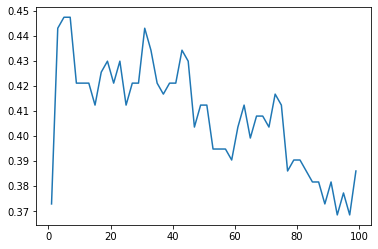

Best Score at K: 5
Final accuracy on train data: 0.6441102756892231
Final accuracy on CV data: 0.4473684210526316
Final accuracy on test data: 0.41608040201005025

Confusion Matrix on Test Data:
110 80 31 25
61 126 29 21
54 62 101 22
70 82 44 77


In [19]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1,100,2)
cv_scores= []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform", p=2)
    knn.fit(X_train_w2v,y_train_w2v)
    y_pred = knn.predict(X_cv_w2v)
    cv_scores.append(accuracy_score(y_cv_w2v,y_pred))
    
optimal_k = plotHyperparameterScores(k_values,cv_scores,"accuracy","K")
knn_model = KNeighborsClassifier(n_neighbors=optimal_k, weights="uniform", p=2)
knn_model.fit(X_train_w2v, y_train_w2v)

y_predTrain= knn_model.predict(X_train_w2v)
y_predCV = knn_model.predict(X_cv_w2v)
y_predTest = knn_model.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accCV = accuracy_score(y_cv_w2v, y_predCV)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_w2v,y_predTest)

### Logistic Regression

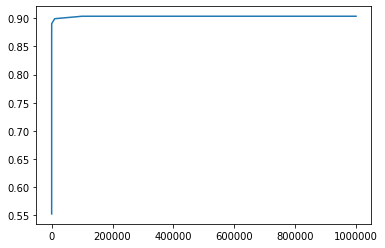

Best Score at C: 100000
Final accuracy on train data: 0.9899749373433584
Final accuracy on CV data: 0.9035087719298246
Final accuracy on test data: 0.821105527638191

Confusion Matrix on Test Data:
195 22 11 18
14 193 10 20
6 15 214 4
19 31 8 215


In [20]:
from sklearn.linear_model import LogisticRegression

C_values=[10**-1,10**0,10**1,10**2,10**4,10**5,10**6]
cv_scores = []

for C in C_values:
    LR = LogisticRegression(C=C, solver="liblinear",multi_class="auto")
    LR.fit(X_train_bow,y_train_bow)
    y_pred = LR.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow,y_pred))
    
optimal_C = plotHyperparameterScores(C_values,cv_scores,"accuracy","C")
LR_model = LogisticRegression(C=optimal_C, solver="liblinear",multi_class="auto")
LR_model.fit(X_train_bow, y_train_bow)

y_predTrain= LR_model.predict(X_train_bow)
y_predCV = LR_model.predict(X_cv_bow)
y_predTest = LR_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

### Multinomial Naive Bayes

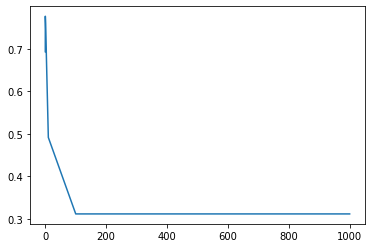

Best Score at alpha: 0.1
Final accuracy on train data: 0.9899749373433584
Final accuracy on CV data: 0.7763157894736842
Final accuracy on test data: 0.735678391959799

Confusion Matrix on Test Data:
191 35 7 13
22 193 8 14
11 31 186 11
27 70 14 162


In [21]:
from sklearn.naive_bayes import MultinomialNB

alpha_values=[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]
cv_scores = []

for alpha in alpha_values:
    NB = MultinomialNB(alpha=alpha)
    NB.fit(X_train_bow,y_train_bow)
    y_pred = NB.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow,y_pred))
    
optimal_alpha = plotHyperparameterScores(alpha_values,cv_scores,"accuracy","alpha")
NB_model = MultinomialNB(alpha=optimal_alpha)
NB_model.fit(X_train_bow, y_train_bow)

y_predTrain= NB_model.predict(X_train_bow)
y_predCV = NB_model.predict(X_cv_bow)
y_predTest = NB_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
   
RF_model = RandomForestClassifier(n_estimators=1000,max_depth=None)
RF_model.fit(X_train_w2v,y_train_w2v)

y_predTrain= RF_model.predict(X_train_w2v)
y_predCV = RF_model.predict(X_cv_w2v)
y_predTest = RF_model.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accCV = accuracy_score(y_cv_w2v, y_predCV)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_w2v,y_predTest)

Final accuracy on train data: 0.9883040935672515
Final accuracy on CV data: 0.4956140350877193
Final accuracy on test data: 0.4321608040201005

Confusion Matrix on Test Data:
100 125 10 11
31 188 5 13
42 113 77 7
43 156 9 65


### SVM(bow)

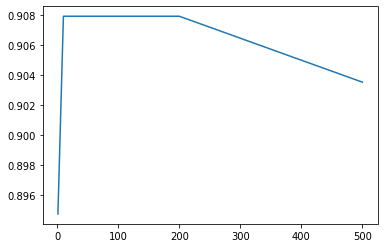

Best Score at C: 10
Final accuracy on train data: 0.9899749373433584
Final accuracy on CV data: 0.9078947368421053
Final accuracy on test data: 0.8251256281407036

Confusion Matrix on Test Data:
196 22 10 18
14 192 11 20
5 14 217 3
17 30 10 216


In [23]:
from sklearn.svm import LinearSVC

C_values=[10**0,10,20,50,80,10**2,120,200,500]
cv_scores = []

for C in C_values:
    SVM = LinearSVC(C = C, dual=False)
    SVM.fit(X_train_bow,y_train_bow)
    y_pred = SVM.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow,y_pred))
    
optimal_C_SVM = plotHyperparameterScores(C_values,cv_scores,"accuracy","C")
SVM_model = LinearSVC(C = optimal_C_SVM, dual=False)
SVM_model.fit(X_train_bow, y_train_bow)

y_predTrain= SVM_model.predict(X_train_bow)
y_predCV = SVM_model.predict(X_cv_bow)
y_predTest = SVM_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

## SVM(w2v)

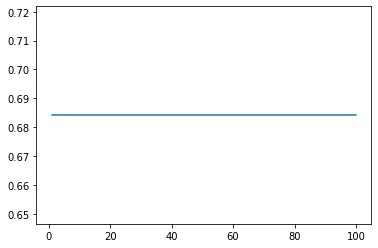

Best Score at C: 1
Final accuracy on train data: 0.7309941520467836
Final accuracy on CV data: 0.6842105263157895
Final accuracy on test data: 0.6422110552763819

Confusion Matrix on Test Data:
148 40 32 26
30 156 32 19
15 26 181 17
40 54 25 154


In [25]:
C_values=[1,10,40,60,100]
cv_scores = []

for C in C_values:
    SVM = LinearSVC(C = C, dual=False)
    SVM.fit(X_train_w2v,y_train_w2v)
    y_pred = SVM.predict(X_cv_w2v)
    cv_scores.append(accuracy_score(y_cv_w2v,y_pred))
    
optimal_C_SVM = plotHyperparameterScores(C_values,cv_scores,"accuracy","C")
SVM_modelW2v = LinearSVC(C = optimal_C_SVM, dual=False)
SVM_modelW2v.fit(X_train_w2v, y_train_w2v)

y_predTrain= SVM_modelW2v.predict(X_train_w2v)
y_predCV = SVM_modelW2v.predict(X_cv_w2v)
y_predTest = SVM_modelW2v.predict(X_test_w2v)
accTrain = accuracy_score(y_train_w2v, y_predTrain)
accCV = accuracy_score(y_cv_w2v, y_predCV)
accTest = accuracy_score(y_test_w2v, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_w2v,y_predTest)

### Stacking Classifiers

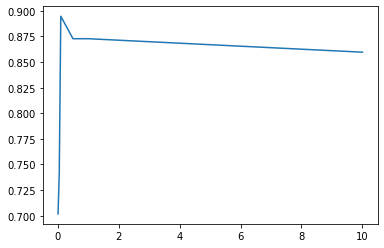

Best Score at C: 0.1
Final accuracy on train data: 0.9887218045112782
Final accuracy on CV data: 0.8947368421052632
Final accuracy on test data: 0.8030150753768844

Confusion Matrix on Test Data:
191 31 6 18
13 193 11 20
5 24 199 11
14 37 6 216


In [45]:
from mlxtend.classifier import StackingClassifier

LR = LogisticRegression(C=10**5, solver="liblinear", multi_class="auto")
SVM= LinearSVC(C=10, dual=False)
NB = MultinomialNB(alpha=0.1)


C = [10**-2,0.05,0.1,0.5,1,10**1]
cv_scores = []

for c in C:
    meta = LogisticRegression(C = c, solver="liblinear", multi_class="auto")
    S_clf = StackingClassifier(classifiers=[LR,SVM,NB], meta_classifier=meta)
    S_clf.fit(X_train_bow,y_train_bow)
    y_pred = S_clf.predict(X_cv_bow)
    cv_scores.append(accuracy_score(y_cv_bow, y_pred))
    
optimal_C_sclf = plotHyperparameterScores(C,cv_scores,"accuracy","C")
meta = LogisticRegression(C=optimal_C_sclf,solver="liblinear",multi_class="auto")
Stack_model = StackingClassifier(classifiers=[LR,SVM,NB], meta_classifier=meta)
Stack_model.fit(X_train_bow, y_train_bow)

y_predTrain= Stack_model.predict(X_train_bow)
y_predCV = Stack_model.predict(X_cv_bow)
y_predTest = Stack_model.predict(X_test_bow)
accTrain = accuracy_score(y_train_bow, y_predTrain)
accCV = accuracy_score(y_cv_bow, y_predCV)
accTest = accuracy_score(y_test_bow, y_predTest)
print("Final accuracy on train data:",accTrain)
print("Final accuracy on CV data:",accCV)
print("Final accuracy on test data:",accTest)

print("\nConfusion Matrix on Test Data:")
showCnfMat(y_test_bow,y_predTest)

## Initial Check

In [ ]:
user_text = input()

tags = re.compile("^@[a-zA-Z_]*")
user_text = re.sub(tags," ",user_text)
hashtags = re.compile("#|\*")
user_text = re.sub(hashtags,"",user_text)
extraCharacters = re.compile("[^a-zA-Z]")
user_text = re.sub(extraCharacters," ",user_text)
    
filtered_text=""
for word in user_text.split():
    word=word.lower()
    if(word not in stop_bow):
        word = sno.stem(word)
        filtered_text+=" "+word

X = normalize(bow_model.transform([filtered_text])).tocsr()
Y = SVM_model.predict(X)
Y = Y[0]
if(Y==0):
    print("Anger")
elif(Y==1):
    print("Fear")
elif(Y==2):
    print("Joy")
else:
    print("Sadness")